### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 6
### Due: Saturday, Mar 23rd at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 

In [2]:
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1 = np.load('/home/rothj1/Desktop/AstroStats/repos/astr_8070_s24/coursework/homeworks/hw_data/hw6_data_1.npy')
print(data1)
print(len(data1))

[[-8.46474567 -3.45517123  1.        ]
 [-9.93233853 -2.31955228  1.        ]
 [-9.30833095 -1.9725388   1.        ]
 ...
 [-3.42236789  1.69166315  2.        ]
 [-3.31992823 -6.1090681   3.        ]
 [-3.62495834  0.11710104  2.        ]]
1000


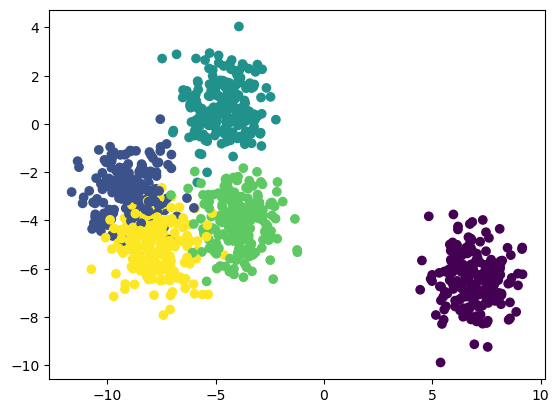

In [4]:
plt.scatter(data1[:,0],data1[:,1],c=data1[:,2]);

2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


In [5]:
# code from Lecture 14 for doing a grid search across bandwidths

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

bwrange = np.linspace(0.1, 1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) # Try each bandwidth with K-folds

grid.fit(data1[:, :2]) # Fit the first two columns
h_opt = grid.best_params_['bandwidth']
print(h_opt)

0.4724137931034482


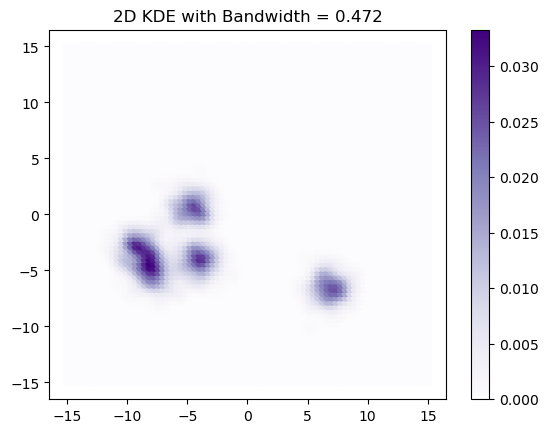

In [167]:
# now plot the 2D KDE of the distribution using this optimal bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=h_opt) # pick a gaussian
kde.fit(data1[:, :2]) #fit the model to the data

u = v = np.linspace(-15,15,80)
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(u, v)))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()
plt.title('2D KDE with Bandwidth = 0.472')
plt.show()


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?

In [7]:
from astroML.density_estimation import KNeighborsDensity
from astropy.visualization import hist

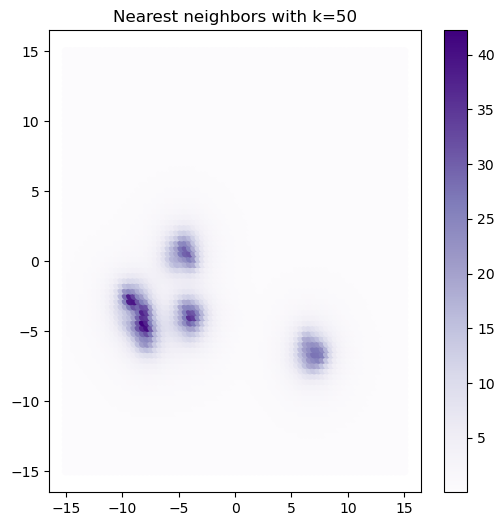

In [163]:
fig = plt.figure(figsize=(6, 6))
k = 50 #Number of neighbors -- change to see what's best

# Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(data1[:, :2]) # first two cols only
dens_nbrs = nbrs.eval(Xgrid) # / N

# plot the results
plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens_nbrs, 
            cmap="Purples", edgecolor="None")
plt.colorbar()
plt.title('Nearest neighbors with k=%i'%k)
plt.show()

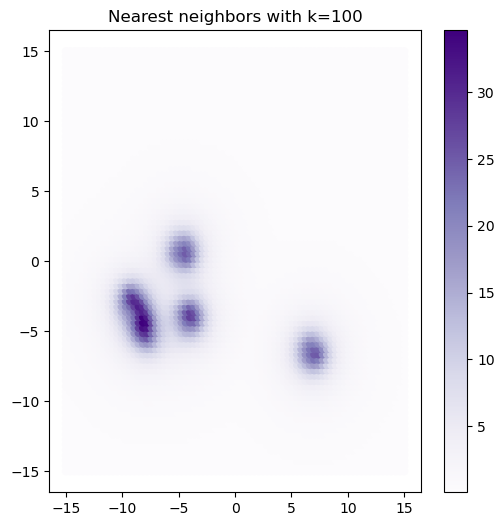

In [164]:
fig = plt.figure(figsize=(6, 6))
k = 100 #Number of neighbors -- change to see what's best

# Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(data1[:, :2]) # first two cols only
dens_nbrs = nbrs.eval(Xgrid) # / N 

# plot the results
plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens_nbrs, 
            cmap="Purples", edgecolor="None")
plt.colorbar()
plt.title('Nearest neighbors with k=%i'%k)
plt.show()

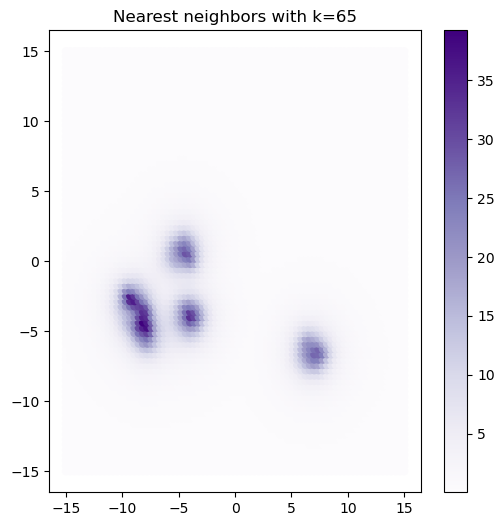

In [169]:
fig = plt.figure(figsize=(6, 6))
k = 65 #Number of neighbors -- change to see what's best

# Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(data1[:, :2]) # first two cols only
dens_nbrs = nbrs.eval(Xgrid) # / N

# plot the results
plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens_nbrs, 
            cmap="Purples", edgecolor="None")
plt.colorbar()
plt.title('Nearest neighbors with k=%i'%k)
plt.show()

A k value between 60 and 75 seems to be the best in terms of recreating the 2D KDE visually. Increasing k seems to "blur" the main structures together and you lose fine details, while a k that is too low does not replicate the density well. 

4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

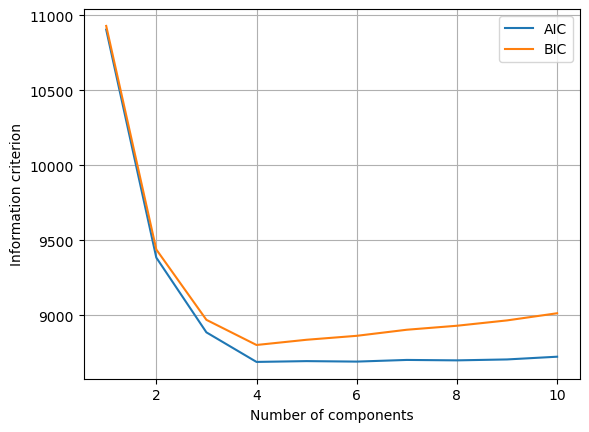

In [74]:
from sklearn.mixture import GaussianMixture

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(data1[:,:2])

# compute the AIC and the BIC
AIC = [m.aic(data1[:,:2]) for m in models]
BIC = [m.bic(data1[:,:2]) for m in models]

plt.plot(N,AIC,label='AIC')
plt.plot(N,BIC,label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Information criterion')
plt.grid()
plt.legend();

The optimal number of components, according to the BIC, is 4. 

In [78]:
# fit the dataset with 4 gaussian components
M_best = models[np.argmin(BIC)] # argmin returns the index of the lowest BIC --> that model is the best model

dir(M_best)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_parameters',
 '_compute_lower_bound',
 '_e_step',
 '_estimate_log_prob',
 '_estimate_log_prob_resp',
 '_estimate_log_weights',
 '_estimate_weighted_log_prob',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_parameters',
 '_get_tags',
 '_initialize',
 '_initialize_parameters',
 '_m_step',
 '_more_tags',
 '_n_parameters',
 '_parameter_constraints',
 '_print_verbose_msg_init_

In [94]:
# get means & covariances
means = M_best.means_
covars = M_best.covariances_

print(means.shape)
print(covars.shape) # shoud have 4 2x2 matrices

(4, 2)
(4, 2, 2)


In [88]:
# Kludge to fix the bug with draw_ellipse in astroML
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs))

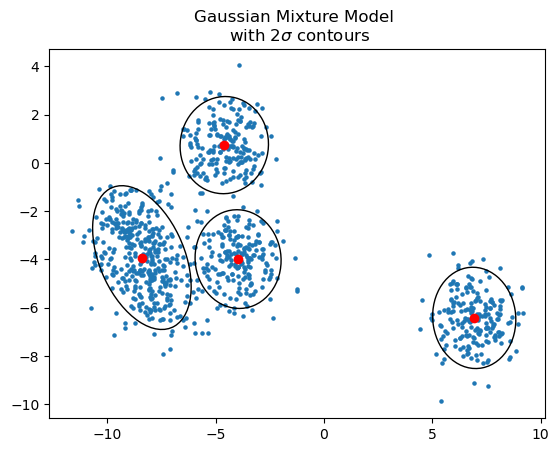

In [114]:
plt.scatter(data1[:,0],data1[:,1],s=5)
plt.scatter(means[:,0],means[:,1],color='red')

for i in range(len(means)):
    draw_ellipse(mu=means[i],C=covars[i],scales=[2],edgecolor='black',fc='None')

plt.title('Gaussian Mixture Model \n with 2$\sigma$ contours')
plt.show()

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

In [151]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
dataScaled = scaler.fit_transform(data1[:,:2])

clf = KMeans(n_clusters=5)
clf.fit(dataScaled)
centers = clf.cluster_centers_ #location of the clusters on scaled data
print('Scaled cluster centers:',centers)

# inverse transform the centers back
centersInv = scaler.inverse_transform(centers)
print('Unscaled cluster centers:',centersInv)

# inverse transform the data back 
dataInv = scaler.inverse_transform(dataScaled)

labels = clf.predict(dataScaled) #labels for each of the points

Scaled cluster centers: [[ 1.85536514 -1.10846459]
 [-0.69852349 -0.66523067]
 [-0.16072001  1.62562286]
 [-0.03983197 -0.12505393]
 [-0.89111701  0.30903188]]
Unscaled cluster centers: [[ 6.93608907 -6.42286837]
 [-7.65114598 -5.25550743]
 [-4.57933395  0.77799508]
 [-3.88884877 -3.83282471]
 [-8.75119663 -2.68955747]]


/home/rothj1/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


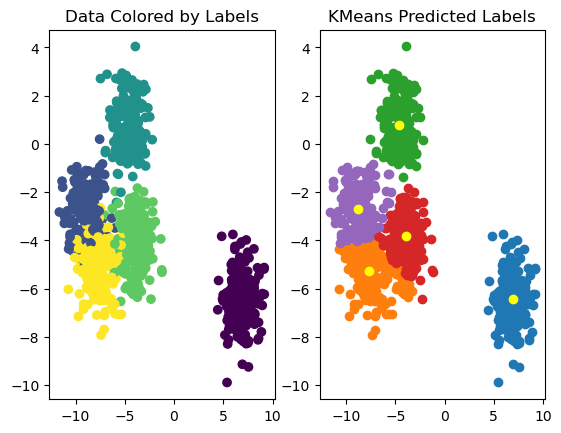

In [174]:
fig, axs = plt.subplots(1,2)

# data colored by labels
axs[0].scatter(data1[:,0],data1[:,1],c=data1[:,2])

# KMeans predicted labels
colors = ['C0','C1','C2','C3','C4']
for ii in range(5):
    axs[1].scatter(dataInv[labels==ii,0], dataInv[labels==ii,1], 
                color=colors[ii])

# superimpose cluster centers
axs[1].scatter(centersInv[:,0],centersInv[:,1],color='yellow')
    
axs[0].set_title('Data Colored by Labels')
axs[1].set_title('KMeans Predicted Labels')

plt.show()